In [1]:
# pca_exploration.ipynb
# Noah Stiegler
# 6/27/24
# Exploring the Principal Component Analysis (PCA) method
# for analyzing hits data from COSMIC at high frequencies

## Setup

In [2]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
else:
    raise Exception("Data path not known")

# Read in data
coherent = pd.read_pickle(coherent_dataset_path)
# incoherent = pd.read_pickle(incoherent_dataset_path)
# df = pd.read_pickle(full_dataset_path)

## All coherent data

In [4]:
# Get rid of columns that aren't numbers
columns_we_care_about = [
    "signal_frequency",
    "signal_drift_rate",
	"signal_snr",
	"signal_beam",
	"signal_power",
	"signal_incoherent_power",
    "signal_num_timesteps",
	"tstart",
	"ra_hours",
	"dec_degrees",
    "source_name"]

data = coherent[columns_we_care_about]
print(data.shape)

(2984740, 11)


In [5]:
# Normalize (standardize) the data to have mean 0 and std dev of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# Create PCA object
pca = PCA()

# Fit PCA to the data
pca.fit(scaled_data)  # Use scaled_data if standardized, df if not standardized

PCA()

In [7]:
# Get the coordinates of the original data in the transformed space
principal_components = pca.transform(scaled_data)  # Use scaled_data if standardized, df if not standardized

In [13]:
# See how much of the variance in the data is explained by
# each principal component
explained_variance = pca.explained_variance_ratio_

In [14]:
# See what the components of the PCAs are
components = pca.components_
columns = data.columns
precision = 4
for i, component in enumerate(components):
    to_print = f"PC {i} = {round(component[0], precision)}x({columns[0]})"
    for j in range(1, len(columns)):
        to_print += f" + {round(component[j], precision)}x({columns[j]})"

    print(to_print)

PCA 0 = -0.0517x(signal_frequency) + 0.0001x(signal_drift_rate) + 0.5646x(signal_snr) + 0.0097x(signal_beam) + 0.5742x(signal_power) + 0.5742x(signal_incoherent_power) + 0.0588x(signal_num_timesteps) + -0.0832x(tstart) + -0.0629x(ra_hours) + -0.0051x(dec_degrees) + 0.0683x(source_name)
PCA 1 = 0.5631x(signal_frequency) + -0.0004x(signal_drift_rate) + 0.0757x(signal_snr) + -0.0871x(signal_beam) + 0.0751x(signal_power) + 0.0751x(signal_incoherent_power) + -0.3336x(signal_num_timesteps) + 0.2546x(tstart) + 0.5434x(ra_hours) + 0.2791x(dec_degrees) + -0.3301x(source_name)
PCA 2 = -0.2951x(signal_frequency) + -0.0002x(signal_drift_rate) + 0.0367x(signal_snr) + -0.0874x(signal_beam) + 0.0342x(signal_power) + 0.0342x(signal_incoherent_power) + -0.4631x(signal_num_timesteps) + 0.3358x(tstart) + -0.1984x(ra_hours) + -0.53x(dec_degrees) + -0.5041x(source_name)
PCA 3 = 0.0069x(signal_frequency) + -0.9979x(signal_drift_rate) + -0.0002x(signal_snr) + 0.049x(signal_beam) + -0.0004x(signal_power) + -0

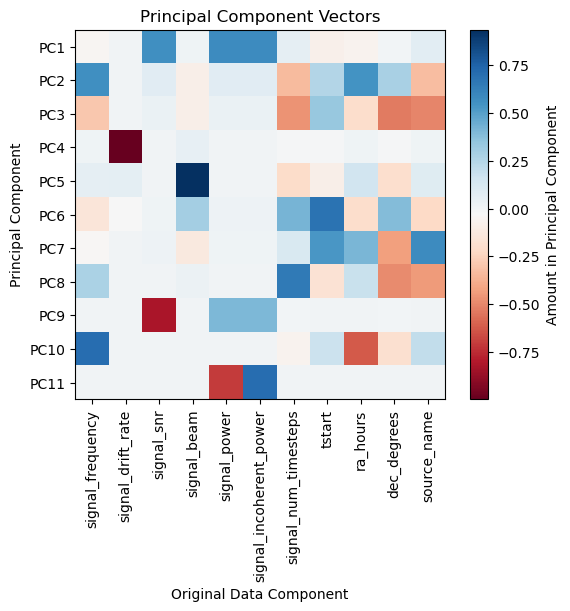

In [22]:
plt.imshow(components, cmap='RdBu')
plt.title("Principal Component Vectors")
plt.xlabel("Original Data Component")
plt.ylabel("Principal Component")

# Colorbar
cbar = plt.colorbar(label="Amount in Principal Component")

# Change ticks
num_components = len(components)
tick_nums = np.arange(num_components)
plt.gca().set_xticks(tick_nums)
plt.gca().set_yticks(tick_nums)
PC_labels = [f"PC{i}" for i in range(1, num_components + 1)]
plt.gca().set_xticklabels(columns, rotation='vertical')
plt.gca().set_yticklabels(PC_labels)

plt.show()

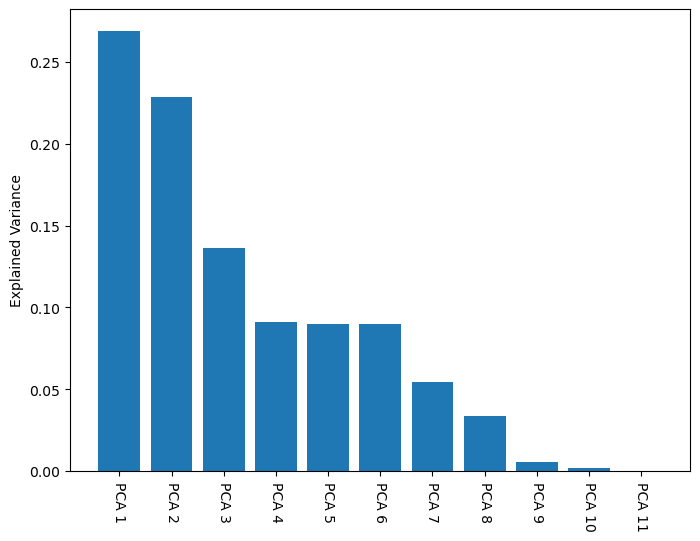

In [17]:
# Plot explained variance
fig, ax = plt.subplots(figsize=(8, 6))
xlabels = [f"PC {i}" for i in range(1, len(explained_variance) + 1)]
ax.bar(xlabels, explained_variance)
plt.xticks(rotation=-90) 
plt.ylabel("Explained Variance")
plt.show()

Text(0, 0.5, 'Variance Explained by Components')

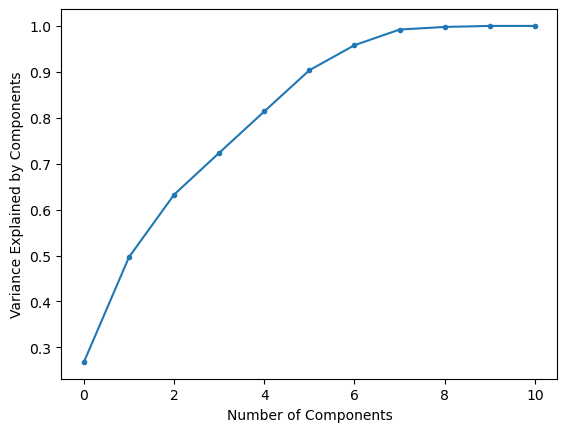

In [18]:
# Plot cumulative variance with number of columns
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(len(data.columns)), cumulative_variance, marker='.')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained by Components")

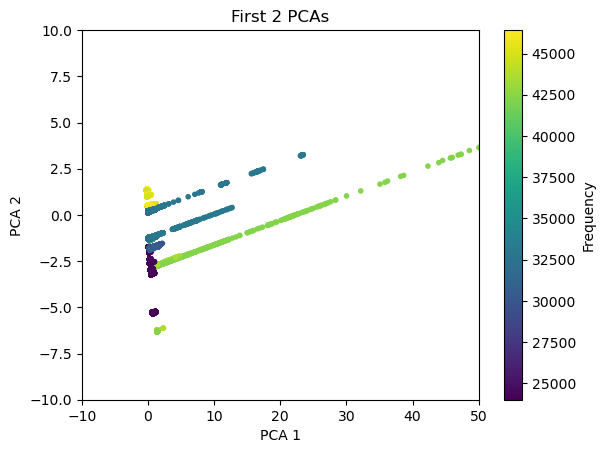

In [19]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], marker=".", c=data["signal_frequency"])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("First 2 PCs")
plt.colorbar(label="Frequency")
plt.ylim([-10, 10])
plt.xlim([-10, 50])
plt.show()

##